<CENTER>
    <h1> Geospatial Data Science Applications: GEOG 4/590</h1>
    <h3>Feb 21, 2022</h3>
    <h2>Lecture 8: Visualization</h2>
    <img src="images/coding-computer-programming.jpeg" width="300"/>
    <h3>Johnny Ryan: jryan4@uoregon.edu</h3>
</CENTER>

## Content of this lecture

* Plotting with `matplotlib`


* Mapping with `cartopy`


* Interactive plotting with `folium`, `geoviews` etc.

## `matplotlib`


* The **standard** library for producing visualizations in Python


* Extremely comprehensive functionality


* Many different plot types and options to customize

### Basic

<img src="images/basic3.png" width="900"/>

### Arrays and fields

<img src="images/basic2.png" width="900"/>

### Statistics

<img src="images/basic1.png" width="900"/>

In [21]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np

## Coding styles

* There are essentially **two** ways to use `matplotlib`:


* 1) **Explicitly create** Figures and Axes, and call methods on them (the **"object-oriented (OO) style"**)


* 2) **Rely** on **pyplot** to **automatically** create and manage the Figures and Axes and use pyplot functions for plotting


* **Pyplot** style can be very convenient for **quick interactive** work


* We recommend using the **OO style** for complicated plots that are intended to be reused as part of a larger project

### Simple plot in `matplotlib` using "object-oriented (OO) style"

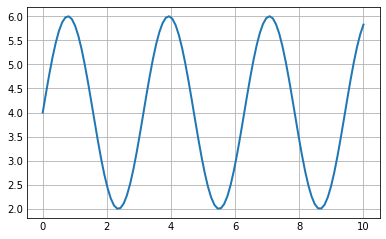

In [16]:
# Make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# Create a figure containing a single axes
fig, ax = plt.subplots(figsize=(5,3)) # Set the figure size in inches 

# Plot data
ax.plot(x, y, linewidth=2.0) # Set linewidth in pixels
plt.show()

### Simple plot in `matplotlib` using "pyplot style"

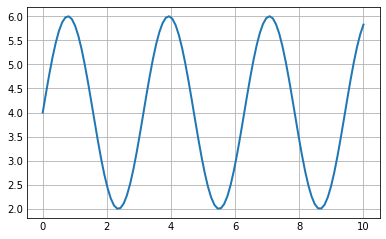

In [20]:
# Make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# Plot data
plt.figure(figsize=(5, 3))
plt.plot(x, y, linewidth=2.0) # Set linewidth in pixels
plt.show()

## Styling Artists

<img src="images/anatomy.webp" width="600"/>

### Colors and line styles

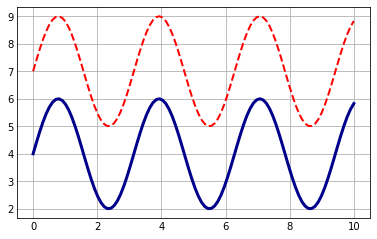

In [25]:
# Create a figure containing a single axes
fig, ax = plt.subplots(figsize=(5,3)) # Set the figure size in inches 

# Plot data
ax.plot(x, y, linewidth=3.0, color='darkblue')
ax.plot(x, y+3, linewidth=2.0, color='red', linestyle='--')
plt.show()

### Axes labels and legends

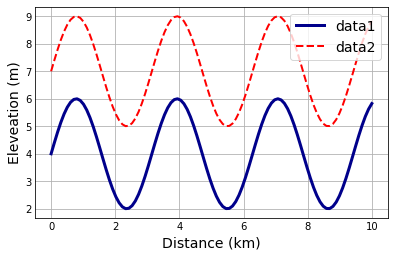

In [31]:
# Create a figure containing a single axes
fig, ax = plt.subplots(figsize=(5,3)) # Set the figure size in inches 

# Plot data
ax.plot(x, y, linewidth=3.0, color='darkblue', label='data1')
ax.plot(x, y+3, linewidth=2.0, color='red', linestyle='--', label='data2')

# Plot legend
ax.legend(fontsize=14)

# Set axes labels
ax.set_xlabel('Distance (km)', fontsize=14)
ax.set_ylabel('Elevation (m)', fontsize=14)

plt.show()

### Axes labels and legends

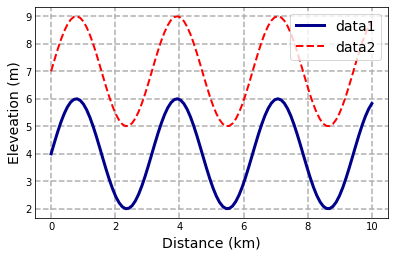

In [34]:
# Create a figure containing a single axes
fig, ax = plt.subplots(figsize=(5,3)) # Set the figure size in inches 

# Plot data
ax.plot(x, y, linewidth=3.0, color='darkblue', label='data1')
ax.plot(x, y+3, linewidth=2.0, color='red', linestyle='--', label='data2')

# Plot legend
ax.legend(fontsize=14)

# Set axes labels
ax.set_xlabel('Distance (km)', fontsize=14)
ax.set_ylabel('Elevation (m)', fontsize=14)

# Set grid style
ax.grid(linestyle='--', linewidth=1.5)

plt.show()

### Axes scales and ticks

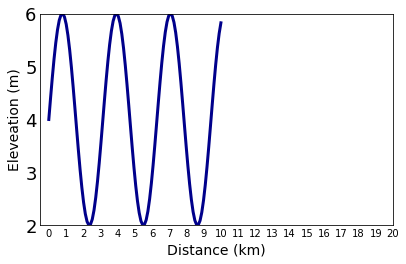

In [52]:
# Create a figure containing a single axes
fig, ax = plt.subplots(figsize=(5,3)) # Set the figure size in inches 

# Plot data
ax.plot(x, y, linewidth=3.0, color='darkblue', label='data1')

# Set axes labels
ax.set_xlabel('Distance (km)', fontsize=14)
ax.set_ylabel('Elevation (m)', fontsize=14)

# Set axes scale and tick labels
ax.set_ylim(2, 6)
ax.set_xticks(np.arange(0, 21, 1))

# Set tick label size
ax.yaxis.set_tick_params(labelsize=18)

# Hide grid lines
ax.grid(False)

plt.show()

### Produce a figure with two axes

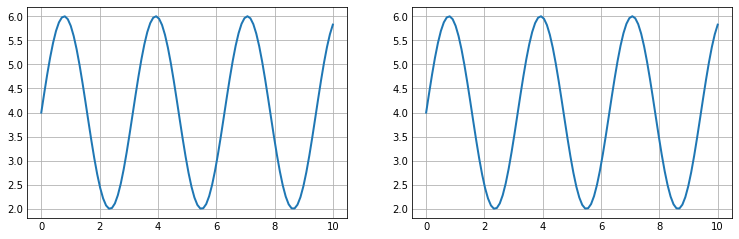

In [53]:
# Create a figure containing two axes
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,3)) 

# Plot data
ax1.plot(x, y, linewidth=2.0)
ax2.plot(x, y, linewidth=2.0)

plt.show()

## Constrained layout

* Automatically adjusts subplots, legends and colorbars etc. so that they **fit in the figure window** while still **preserving**, as best they can, the **logical layout** requested by the user.

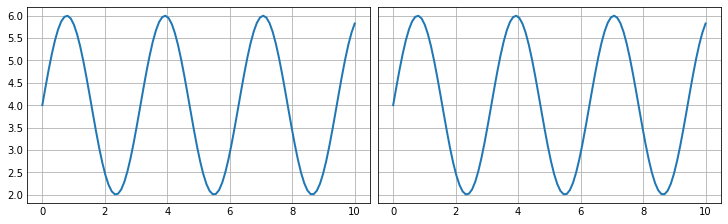

In [60]:
# Create a figure containing two axes
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10,3), layout='constrained', sharey=True) 

# Plot data
ax1.plot(x, y, linewidth=2.0)
ax2.plot(x, y, linewidth=2.0)

plt.show()

### More information

https://matplotlib.org/stable/tutorials/index.html

## `cartopy`

* Package designed for geospatial data processing in order to **produce maps** and other geospatial data analyses


* Built using the powerful `PROJ`, `numpy` and `shapely` libraries and includes a programmatic interface built on top of `matplotlib` for the creation of publication quality maps.

In [70]:
# Import packages
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

### Simple map of world coastlines

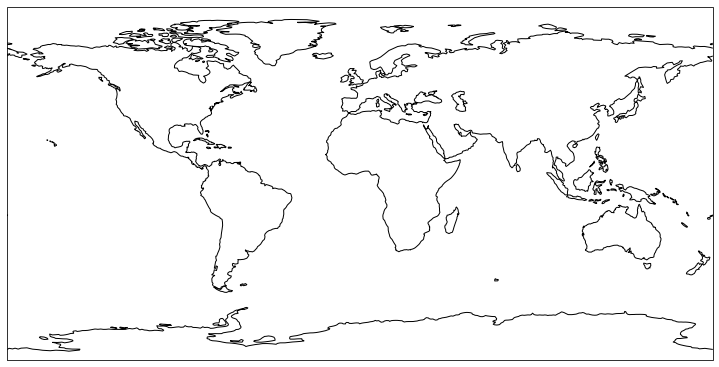

In [69]:
# Create figure with no axes
fig = plt.figure(figsize=(10, 10))

# Define a GeoAxes instance with PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines to axes
ax.coastlines()
plt.show()

### Add point data to map

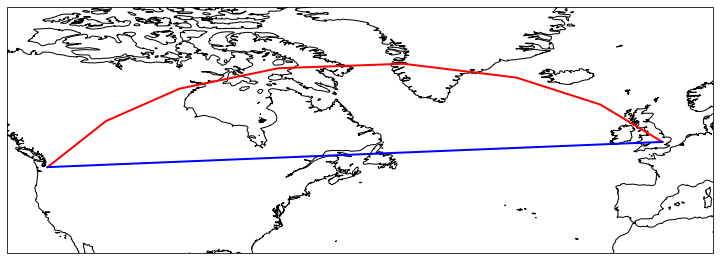

In [81]:
seattle_lon, seattle_lat, london_lon, london_lat = -122, 47, 0, 52

# Create figure with no axes
fig = plt.figure(figsize=(10, 10))

# Define a GeoAxes instance with PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Set extent
ax.set_extent([-130, 10, 30, 60], ccrs.Geodetic())

# Plot data
plt.plot([seattle_lon, london_lon], [seattle_lat, london_lat], color='red', 
         linewidth=2, transform=ccrs.Geodetic())

plt.plot([seattle_lon, london_lon], [seattle_lat, london_lat], color='blue', 
         linewidth=2, transform=ccrs.PlateCarree())

# Add coastlines to axes
ax.coastlines()

### Add gridded data to map

In [92]:
# Import packages
import xarray as xr

# Read data
tp = xr.open_dataset('/Users/jryan4/Dropbox (University of Oregon)/Teaching/geospatial-data-science/data/lecture8/era_2020_tp.nc')

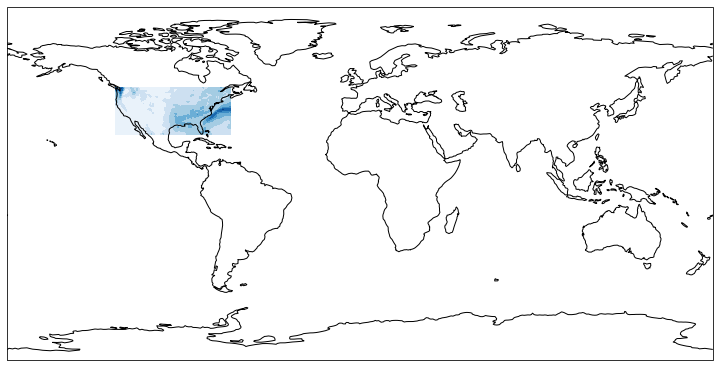

In [98]:
# Create figure with no axes
fig = plt.figure(figsize=(10, 10))

# Define a GeoAxes instance with PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

ax.contourf(tp['longitude'], tp['latitude'], np.mean(tp['tp'], axis=0))  # didn't use transform, but looks ok...
plt.show()

### Change projection systems

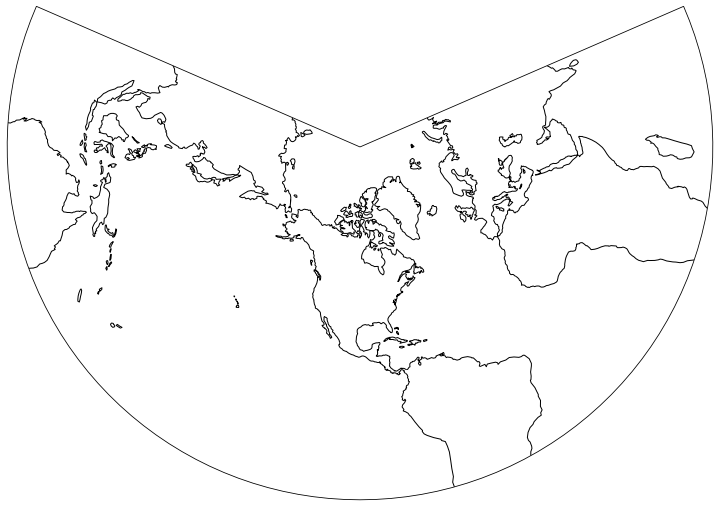

In [101]:
# Create figure with no axes
fig = plt.figure(figsize=(10, 10))

# Define a GeoAxes instance with LambertConformal projection
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_global()
ax.coastlines()

ax.contourf(tp['longitude'], tp['latitude'], np.mean(tp['tp'], axis=0)) # didn't use transform, uh oh!
plt.show()

### Change projection and define data transform

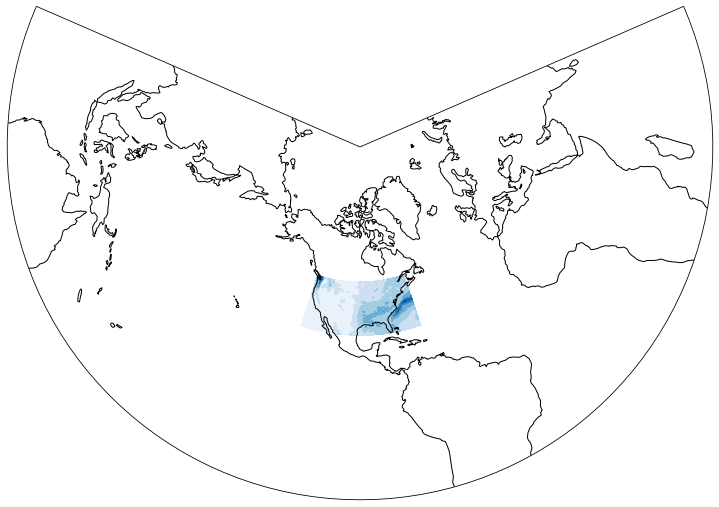

In [100]:
# The data are defined in lat/lon coordinate system so:
data_crs = ccrs.PlateCarree()

# Create figure with no axes
fig = plt.figure(figsize=(10, 10))

# Define a GeoAxes instance with PlateCarree projection
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_global()
ax.coastlines()

ax.contourf(tp['longitude'], tp['latitude'], np.mean(tp['tp'], axis=0), transform=data_crs)
plt.show()

### Set map extent

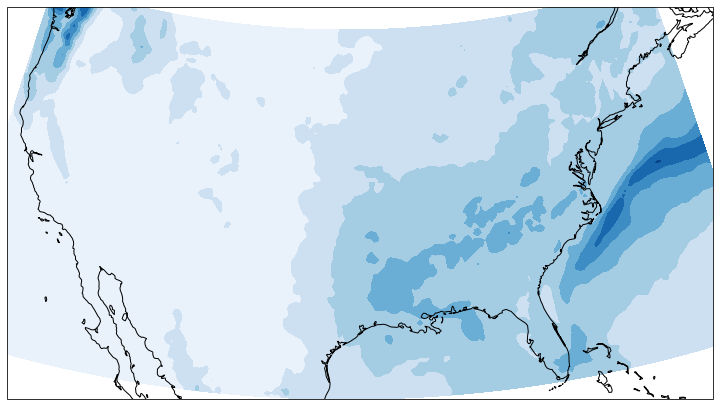

In [107]:
# Create figure with no axes
fig = plt.figure(figsize=(10, 10))

# Define a GeoAxes instance with PlateCarree projection
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_global()
ax.coastlines()

# Set extent 
ax.set_extent([-120, -70, 25, 48], crs=ccrs.PlateCarree())

ax.contourf(tp['longitude'], tp['latitude'], np.mean(tp['tp'], axis=0), transform=data_crs)
plt.show()

/var/folders/xj/5ps5mr8d5ysbd2mxxqjg3k800000gq/T/ipykernel_16321/1677689415.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(cf, shrink=0.4)


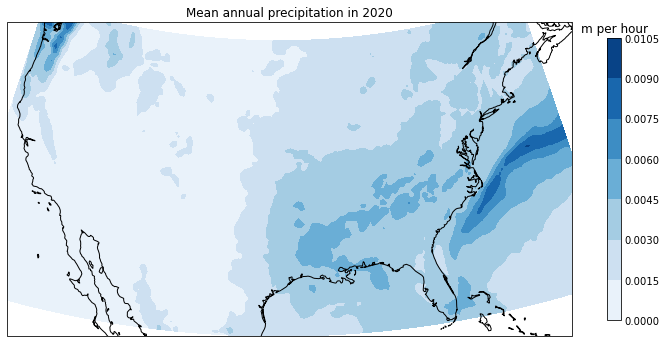

In [118]:
# Create figure with no axes
fig = plt.figure(figsize=(10, 10))

# Define a GeoAxes instance with PlateCarree projection
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_global()
ax.coastlines()

# Set extent 
ax.set_extent([-120, -70, 25, 48], crs=ccrs.PlateCarree())

cf = ax.contourf(tp['longitude'], tp['latitude'], np.mean(tp['tp'], axis=0), transform=data_crs)

# Add a colorbar and labels
cb = plt.colorbar(cf, shrink=0.4)
cb.ax.set_title('m per hour')
ax.set_title('Mean annual precipitation in 2020')
plt.show()

In [123]:
tp


<xarray.Dataset>
Dimensions:    (longitude: 237, latitude: 97, time: 12)
Coordinates:
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -66.5 -66.25 -66.0
  * latitude   (latitude) float32 49.0 48.75 48.5 48.25 ... 25.5 25.25 25.0
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-12-01
Data variables:
    tp         (time, latitude, longitude) float32 0.02432 0.02211 ... 0.00361
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-02 20:21:28 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

## `folium`

* Sometimes interactive, web-based displays of geospatial data are more useful/powerful than static figures


* `folium` is a web mapping framework based on `Leaflet` that allows us to produce interactive maps


In [128]:
# Import package
import folium

### Basics

In [135]:
# Open a map at specific loction and zoom
m = folium.Map(location=[45.5236, -122.6750], zoom_start=11)
m

### Tiles

* The default tiles are **OpenStreetMap**, but others tiles (e.g. **Stamen Terrain**, **Stamen Toner**) are built in. Some of them require an API key.

In [144]:
m = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles="Stamen Terrain")
m

### Adding markers with labels

In [151]:
m = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles="Stamen Terrain")

# Add italic or bold markers
folium.Marker([45.3288, -121.6625], 
              popup="<i>Mt. Hood Meadows</i>").add_to(m)
folium.Marker([45.3311, -121.7113], 
              popup="<b>Timberline Lodge</b>", 
              icon=folium.Icon(color="red", icon="info-sign")).add_to(m)
m

### Chloropleth maps

ModuleNotFoundError: No module named 'geopandas'